In [148]:
import cv2
import math
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from PIL import Image
#import imquality.brisque as brisque
#from pdf2image import convert_from_path
#import PyPDF2
from pytesseract import Output
import pytesseract
from PIL import Image
import os
#import img2pdf

In [149]:
def imgshow(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

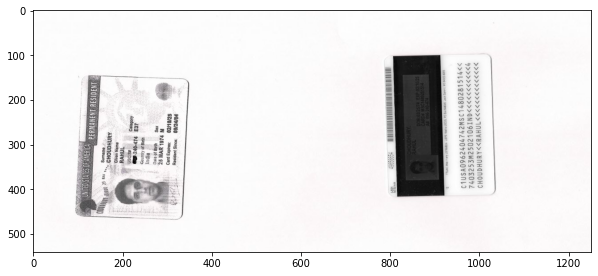

In [513]:
image = cv2.imread('./rotation_fail/prc6.JPG')
imgshow(image)

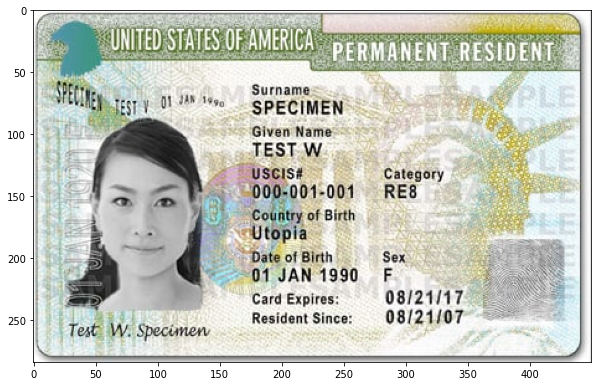

In [514]:
refimage = cv2.imread('./rotation_fail/greencard.jpg')
#alpha = 2 # Contrast control (1.0-3.0)
#beta = 50 # Brightness control (0-100)
#refimage = cv2.convertScaleAbs(refimage, alpha=alpha, beta=beta)
imgshow(refimage)

In [515]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(image,None)
kp2, des2 = sift.detectAndCompute(refimage,None)

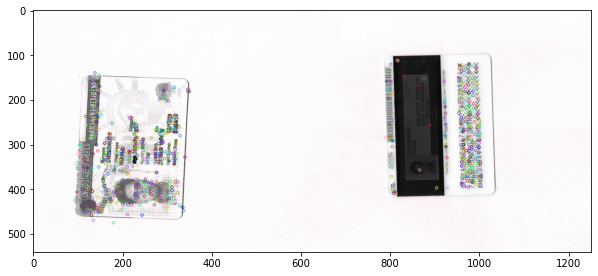

In [516]:
im=cv2.drawKeypoints(image, kp1, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
imgshow(im)

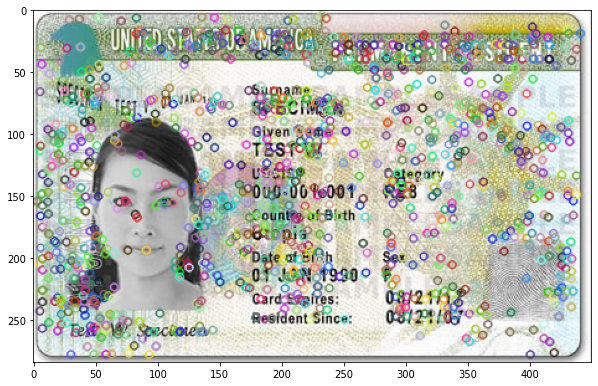

In [517]:
im=cv2.drawKeypoints(refimage, kp2, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
imgshow(im)

In [518]:
FLANN_INDEX_KDTREE =1
index_params = dict(algorithm= FLANN_INDEX_KDTREE, trees= 5)
search_params = dict(checks= 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

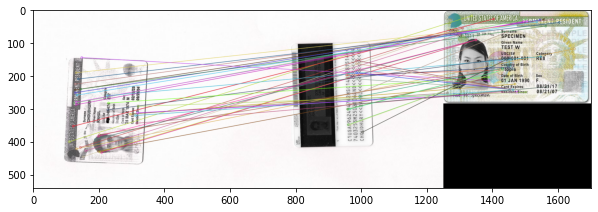

In [519]:
img3 = cv2.drawMatchesKnn(image,kp1,refimage,kp2,[good],None,flags=2)
imgshow(img3)

In [520]:
src_pts  = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts  = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

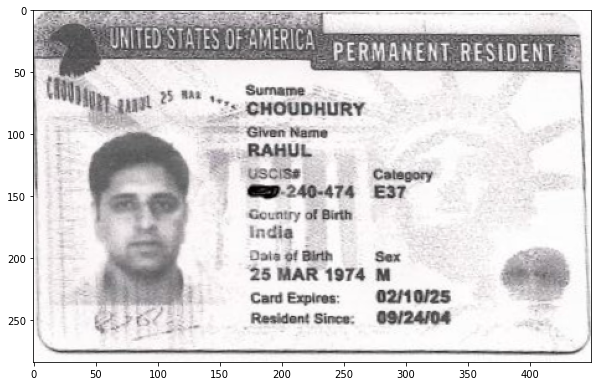

In [521]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
h,w = refimage.shape[:2]
dstimage = cv2.warpPerspective(image,M,(w,h))
imgshow(dstimage)